# Importing the neccessary libraries and dataset

In [ ]:
!pip install transformers
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
# Load the simulation trace from the CSV file
df = pd.read_csv('{Enter your dataset}');

# Get the column names from the DataFrame
column_names = df.columns.tolist()

# Selecting the value of K and generating new assertions

In [ ]:
# Generate conditional sequences from the simulation trace
conditional_sequences = []
for row in simulation_trace:
    for i in range(len(row)):
        # Enter the value of k below
        if i + k <= len(row):
            conditions = [f"{column_names[j]}={row[j]}" for j in range(i, i+k)]
            sequence = " and ".join(conditions)
            conditional_sequences.append(sequence)




# Setting up the model

In [ ]:
# Set up the BERT model for inference
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

# Making prediction to check if the assertions are true assertions


In [ ]:
not_imp=0
always_true_assertions = []
for sequence in conditional_sequences:
    encoding = tokenizer.encode_plus(sequence, add_special_tokens=True, truncation=True, padding='max_length', max_length=128, return_tensors='pt')
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        predicted_label = torch.argmax(outputs.logits).item()

    if predicted_label == 1:
        always_true_assertions.append(sequence)
    else:
        not_imp+=1

# Remove duplicates from the list of always true assertions
always_true_assertions_dup_removed = list(set(always_true_assertions))

# Saving the dataset

In [ ]:
# Store the always true assertions in a text file
with open('{Enter the location where you want to store the dataset}', 'w') as file:
    for assertion in always_true_assertions_dup_removed:
        file.write(assertion + '\n')

# Checking the model for a dataset and seeing the results

In [17]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_input_format.csv')
simulation_trace = df.values.tolist()


column_names = df.columns.tolist()
tot_conditional_sequences=[]
tot_always_true_assertions_duplicated=[]
tot_always_true_assertions_unique=[]
tot_not_imp=[]

for k in range(4,len(column_names)+1):
  conditional_sequences = []
  for row in simulation_trace:
      for i in range(len(row)):
          if i + k <= len(row):
              conditions = [f"{column_names[j]}={row[j]}" for j in range(i, i+k)]
              sequence = " and ".join(conditions)
              conditional_sequences.append(sequence)

  model_name = 'bert-base-uncased'

  tokenizer = BertTokenizer.from_pretrained(model_name)
  model = BertForSequenceClassification.from_pretrained(model_name)

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model.to(device)
  model.eval()
  not_imp=0;

  always_true_assertions = []
  for sequence in conditional_sequences:
      encoding = tokenizer.encode_plus(sequence, add_special_tokens=True, truncation=True, padding='max_length', max_length=256, return_tensors='pt')
      input_ids = encoding['input_ids'].to(device)
      attention_mask = encoding['attention_mask'].to(device)

      with torch.no_grad():
          outputs = model(input_ids, attention_mask=attention_mask)
          predicted_label = torch.argmax(outputs.logits).item()

      if predicted_label == 1:
          always_true_assertions.append(sequence)
      else:
         not_imp+=1

  always_true_assertions_dup_removed = list(set(always_true_assertions))


  num_always_true_assertions = len(always_true_assertions_dup_removed)
  tot_conditional_sequences.append(len(conditional_sequences))
  tot_always_true_assertions_duplicated.append(len(always_true_assertions))
  tot_always_true_assertions_unique.append(num_always_true_assertions)
  tot_not_imp.append(not_imp)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

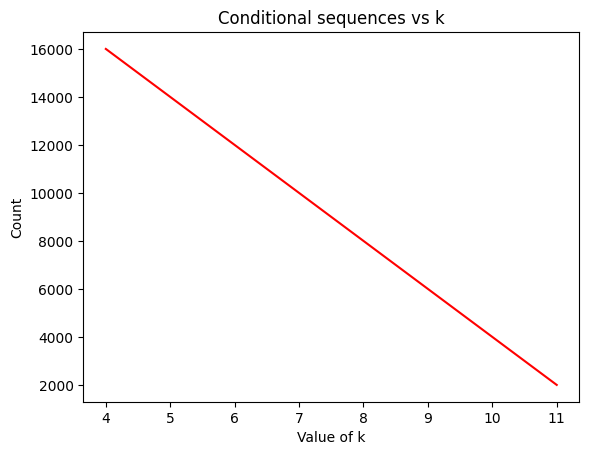

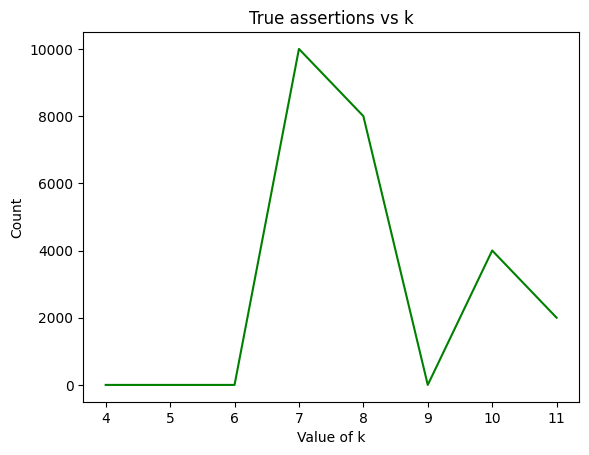

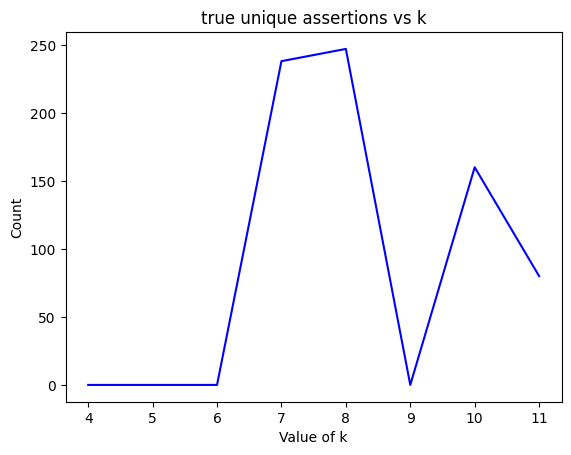

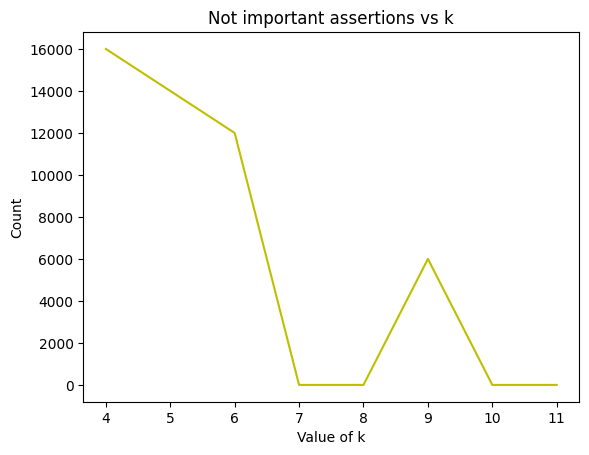

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math
x=[4,5,6,7,8,9,10,11]

plt.plot(x, tot_conditional_sequences, color='r')
plt.xlabel("Value of k")
plt.ylabel("Count")
plt.title("Conditional sequences vs k")
plt.show()

plt.plot(x, tot_always_true_assertions_duplicated, color='g')
plt.xlabel("Value of k")
plt.ylabel("Count")
plt.title("True assertions vs k")
plt.show()

plt.plot(x, tot_always_true_assertions_unique, color='b')
plt.xlabel("Value of k")
plt.ylabel("Count")
plt.title("true unique assertions vs k")
plt.show()

plt.plot(x, tot_not_imp, color='y')
plt.xlabel("Value of k")
plt.ylabel("Count")
plt.title("Not important assertions vs k")
plt.show()



